In [ ]:
#In this part we will extract the dataset from kaggle to drive directly 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d prasunroy/natural-images

 97% 333M/342M [00:12<00:00, 31.2MB/s]
100% 342M/342M [00:12<00:00, 28.4MB/s]


In [ ]:
#use this command for listing files in the directory
!ls


kaggle.json  natural-images.zip


In [ ]:
#fetching files from zipped file and removing the zipped file
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/cat/cat_0204.jpg  
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
  inflati

In [ ]:
import numpy as np
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
train_gen = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Kaggle/natural_images',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='training')
val_gen  = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Kaggle/natural_images',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',subset='validation')

Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.


In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, Y)
#x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
from keras.layers import Dropout
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution & pooling
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same',activation='relu', input_shape=[150, 150, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2))

# Adding convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3,padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())
# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=8, activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               5308672   
_________________________________________________________________
dense_3 (Dense)              (None, 8)                

In [ ]:
cnn.compile(optimizer = 'RMSprop', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

In [ ]:
history=cnn.fit(x = train_gen, validation_data = val_gen, epochs = 30,batch_size=128)

SyntaxError: ignored

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Kaggle/assets


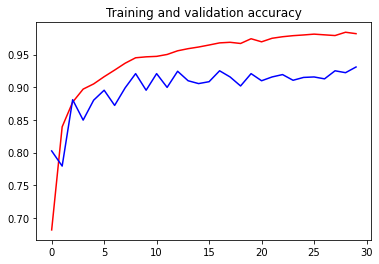

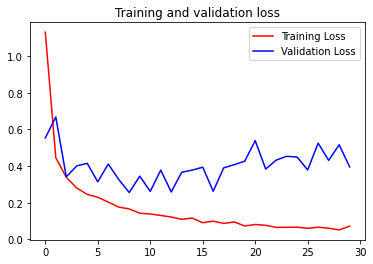

In [ ]:
cnn.save('/content/gdrive/MyDrive/Kaggle')
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for i in uploaded.keys():
  path = i
  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  x = x/255.
  images=np.vstack([x])
  classes=cnn.predict(images,batch_size=10)
  print(i)
  print(classes)

Saving IMG-20180708-WA0103_2.jpg to IMG-20180708-WA0103_2 (1).jpg
IMG-20180708-WA0103_2.jpg
[[3.27101041e-10 7.43379913e-10 1.00169746e-04 1.20317811e-04
  2.60067102e-03 2.93820385e-11 9.97178793e-01 2.32418760e-14]]
